In this notebook I am showing Linear Regression to predict sales(lakhs) on the basis of money invested in their advertising
on TV, Radio, NewsPaper (in thousands). After this we will improve the model accuracy by using Polynomial Regression on the features with appropriate degree.

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
df = pd.read_csv('Advertising.csv')

In [97]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [98]:
df.shape

(200, 4)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [100]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

<Figure size 720x576 with 0 Axes>

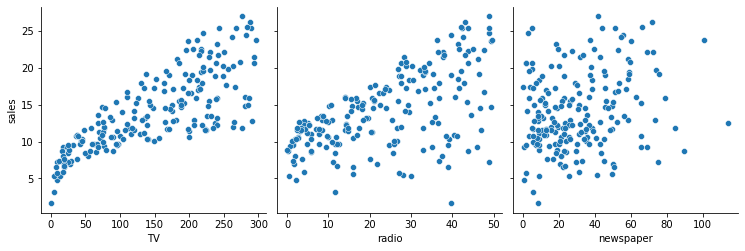

In [101]:
plt.figure(figsize=(10,8))
sns.pairplot(data=df,x_vars=['TV','radio','newspaper'],y_vars=['sales'],height=3.5)

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [103]:
X = df.drop('sales',axis=1)

In [104]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [105]:
y = df['sales']

In [106]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [108]:
X_train.head()

,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8


In [109]:
y_train

85     15.2
183    26.2
127     8.8
53     21.2
100    11.7
       ... 
63     14.0
70     18.3
81     12.3
11     17.4
95     16.9
Name: sales, Length: 140, dtype: float64

In [110]:
X_test

,TV,radio,newspaper
37,74.7,49.4,45.7
109,255.4,26.9,5.5
31,112.9,17.4,38.6
89,109.8,47.8,51.4
66,31.5,24.6,2.2
119,19.4,16.0,22.3
54,262.7,28.8,15.9
74,213.4,24.6,13.1
145,140.3,1.9,9.0
142,220.5,33.2,37.9


In [111]:
y_test.head()

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
Name: sales, dtype: float64

In [112]:
model = LinearRegression()

In [113]:
model.fit(X_train,y_train)

LinearRegression()

In [114]:
model.coef_

array([ 0.04469599,  0.1875657 , -0.00032275])

In [115]:
list(zip(X,model.coef_))

[('TV', 0.04469599323076605),
 ('radio', 0.18756570186586996),
 ('newspaper', -0.0003227530099873282)]

In [116]:
model.intercept_

3.151526768070651

In [117]:
y_pred = model.predict(X_test)

In [118]:
y_pred

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [119]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [120]:
mae = mean_absolute_error(y_test,y_pred)

In [121]:
mae

1.2137457736144805

In [122]:
mse = mean_squared_error(y_test,y_pred)

In [123]:
mse

2.298716697886378

In [124]:
#RMSE
rmse = np.sqrt(mse)

In [125]:
rmse

1.5161519375993877

In [126]:
from sklearn.metrics import accuracy_score

In [127]:
model.score(X,y)*100

89.67801372381916

<AxesSubplot:xlabel='sales', ylabel='Count'>

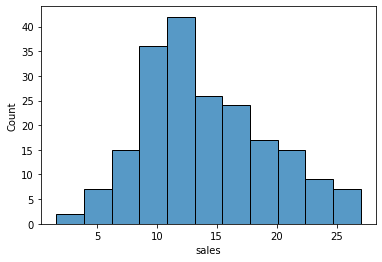

In [128]:
sns.histplot(x='sales',data=df)

In [129]:
residuals = y_test - y_pred

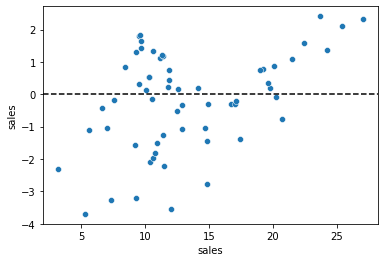

In [130]:
sns.scatterplot(x=y_test,y=residuals)
plt.axhline(y=0,color='black',ls='--')  #?

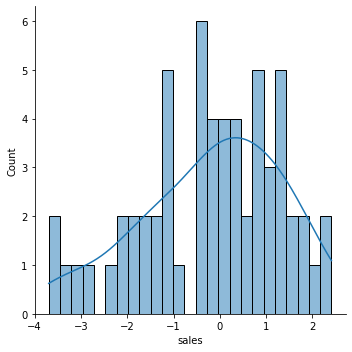

In [131]:
sns.displot(residuals,bins=25,kde=True)

In [132]:
import scipy as sp

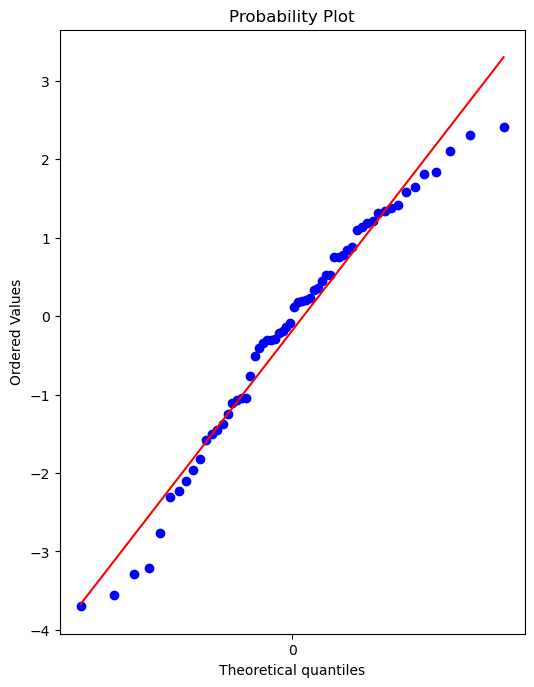

In [133]:
fig,ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
sns.barplot()
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(residuals,plot=ax) 

# Polynomial Regression

Therefore model accuracy is still 89.67% but we can increase it by using Polynomial Regression 
on the features. So we first have to decide what degree of polynomial we have to choose so that 
our model neither overfitted nor underfitted.

Firstly,we are taking degree as 2 just for overview.

In [134]:
from sklearn.preprocessing import PolynomialFeatures

In [135]:
pol = PolynomialFeatures(degree=2,include_bias=False)

In [136]:
pol.fit(X)

PolynomialFeatures(include_bias=False)

In [137]:
pol_features = pol.transform(X)

In [138]:
X.shape

(200, 3)

In [139]:
pol_features.shape 

(200, 9)

In [140]:
pol_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [141]:
X_train, X_test, y_train, y_test = train_test_split(pol_features, y, test_size=0.3, random_state=101)

In [142]:
new_model = LinearRegression()

In [143]:
new_model.fit(X_train,y_train)

LinearRegression()

In [144]:
new_predictions = new_model.predict(X_test)

In [145]:
new_predictions

array([13.94856153, 19.33480262, 12.31928162, 16.76286337,  7.90210901,
        6.94143792, 20.13372693, 17.50092709, 10.56889   , 20.12551788,
        9.44614537, 14.09935417, 12.05513493, 23.39254049, 19.67508393,
        9.15626258, 12.1163732 ,  9.28149557,  8.44604007, 21.65588129,
        7.05070331, 19.35854208, 27.26716369, 24.58689346,  9.03179421,
       11.81070232, 20.42630125,  9.19390639, 12.74795186,  8.64340674,
        8.66294151, 20.20047377, 10.93673817,  6.84639129, 18.27939359,
        9.47659449, 10.34242145,  9.6657038 ,  7.43347915, 11.03561332,
       12.65731013, 10.65459946, 11.20971496,  7.46199023, 11.38224982,
       10.27331262,  6.15573251, 15.50893362, 13.36092889, 22.71839277,
       10.40389682, 13.21622701, 14.23622207, 11.8723677 , 11.68463616,
        5.62217738, 25.03778913,  9.53507734, 17.37926571, 15.7534364 ])

In [146]:
new_mae = mean_absolute_error(y_test,new_predictions)

In [147]:
new_mae

0.48967980448038056

In [148]:
new_mse = mean_squared_error(y_test,new_predictions)

In [149]:
new_mse

0.4417505510403708

In [150]:
#new rmse
new_rmse = np.sqrt(new_mse)

In [151]:
new_rmse

0.664643175726924

In [152]:
new_model.score(pol_features,y)*100

98.61731356266267

## How much degree to be choose for polynomial regression

In [153]:
#create the diffrent order poly
#split poly features into train/test
#fit on train
# store/save the rmse for BOTH train AND test
#plot the results (error vs poly order)

In [154]:
train_rmse_errors = []
test_rmse_errors = []
for d in range(1,10):
    
    polynomials = PolynomialFeatures(degree=d,include_bias=False)
    polynomial_features = polynomials.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(polynomial_features, y, test_size=0.3, random_state=101)
    
    model2 = LinearRegression()
    model2.fit(X_train,y_train)
    
    train_pred = model2.predict(X_train)
    test_pred = model2.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test,test_pred))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [155]:
train_rmse_errors

[1.734594124329376,
 0.5879574085292231,
 0.4339344356902067,
 0.35170836883993606,
 0.25093429381786897,
 0.1945666472024403,
 5.423737279770718,
 0.14168056686637134,
 0.17093527228363956]

In [156]:
test_rmse_errors

[1.5161519375993877,
 0.664643175726924,
 0.5803286825161322,
 0.5077742623175882,
 2.575837063490081,
 4.214027384734879,
 1374.9574048884183,
 4344.727850519797,
 93796.02671838581]

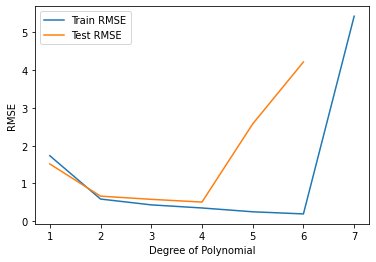

In [157]:
plt.plot(range(1,8),train_rmse_errors[0:7],label='Train RMSE')
plt.plot(range(1,7),test_rmse_errors[0:6],label='Test RMSE')
plt.ylabel('RMSE')
plt.xlabel('Degree of Polynomial')
plt.legend()

From the above obeservations we conclude that polynomial with degree 4 is the best to choose in order to get maximum accuracy
so we will choose degree=4 for our model.

*Note-The more you increase the degree of the polynomial, the more will the complexity of the model

In [158]:
#Taking degree=4

In [159]:
pol2 = PolynomialFeatures(degree=4,include_bias=False)

In [160]:
pol2_features = pol2.fit_transform(X)

In [161]:
X.shape

(200, 3)

In [162]:
pol2_features.shape

(200, 34)

In [163]:
X_train, X_test, y_train, y_test = train_test_split(pol2_features, y, test_size=0.3, random_state=101)

In [164]:
X_train.shape

(140, 34)

In [165]:
model2 = LinearRegression()

In [166]:
model2.fit(X_train,y_train)

LinearRegression()

In [167]:
predictions2 = model2.predict(X_test)

In [168]:
predictions2

array([15.0344192 , 19.27079688, 12.33801841, 17.39069647,  8.39249954,
        6.82587636, 20.16825414, 17.22814878, 10.19809543, 19.75830195,
        9.83173834, 13.79039702, 11.92253394, 23.26104734, 19.00023529,
        9.9706653 , 12.43811198,  9.44604193,  8.93434412, 21.28729904,
        7.03745968, 18.96355554, 27.08053951, 24.55959164,  9.80640966,
       11.42747983, 20.21245059,  9.86911135, 12.22351307,  8.30476352,
        8.77413388, 19.81403772, 10.637733  ,  6.87491962, 17.77173164,
        9.54202567, 10.62714875,  9.88620146,  6.79619214, 10.58653068,
       12.88726067, 10.16745108, 11.45064265,  7.61348037, 12.2721956 ,
       11.09651806,  4.97917269, 15.50179828, 13.07998668, 22.41385685,
       11.03767281, 12.86713374, 14.77243176, 12.10155652, 11.23159316,
        4.59603446, 24.80939417,  9.81152064, 17.53647682, 15.28897789])

In [169]:
mae2 = mean_absolute_error(y_test,predictions2)

In [170]:
mae2

0.39260937445667116

In [171]:
mse2 = mean_squared_error(y_test,predictions2)

In [172]:
mse2

0.2578347014721708

In [173]:
#New RMSE
rmse2 = np.sqrt(mse2)

In [174]:
rmse2

0.5077742623175882

In [175]:
model2.score(pol2_features,y)*100

99.39473859144043

99.39% accuracy is a very high and efficient model.